In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pdb_info = {}
with open('pdb_info.csv') as f:
    for i, line in enumerate(f.readlines()):
        if i == 0:
            continue
        fs = line.strip().split(',')
        pdb_info[fs[0]] = {'residues' : int(fs[1]),
                           'class' : fs[2]}

tm_df = pd.read_csv('tm.csv')
tm_df['class'] = 'TM'
cc_df = pd.read_csv('coiled-coil.csv')
cc_df['class'] = 'CC'
tst_df = pd.read_csv('testset.csv')
tst_df['class'] = tst_df['pdb'].map(lambda x: pdb_info[x]['class'])
df = pd.concat([tm_df, cc_df, tst_df])
df = df[['pdb', 'class', 'time']]
grp = df.groupby('pdb')
dft = grp.aggregate([np.mean, np.std])
dft['residues'] = dft.index.map(lambda x: pdb_info[x]['residues'])
dft['class'] = grp.first()['class']

tm_contacts_df = pd.read_csv('tm_gremlin.csv')
tm_contacts_df['class'] = 'TM_contacts'
tm_contacts_df = tm_contacts_df[['pdb', 'class', 'time']]
grp = tm_contacts_df.groupby('pdb')
dfc = grp.aggregate([np.mean, np.std])
dfc['residues'] = dfc.index.map(lambda x: pdb_info[x]['residues'])
dfc['class'] = grp.first()['class']

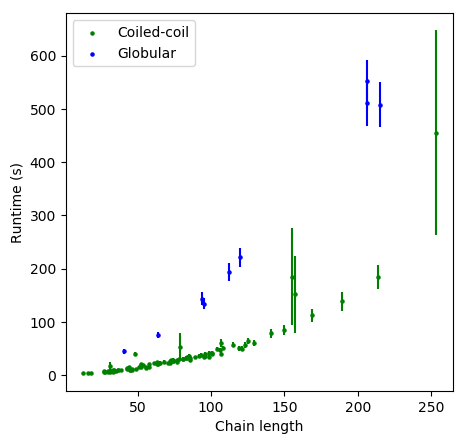

In [42]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
xvals = dft[dft['class'] == 'CC']['residues']
yvals = dft[dft['class'] == 'CC']['time']['mean']
yerr = dft[dft['class'] == 'CC']['time']['std']
ax.scatter(xvals, yvals, color='green', s=5)
ax.errorbar(xvals, yvals, yerr, fmt='none', ecolor='green')


xvals = dft[dft['class'] == 'Glob']['residues']
yvals = dft[dft['class'] == 'Glob']['time']['mean']
yerr = dft[dft['class'] == 'Glob']['time']['std']
ax.scatter(xvals, yvals, color='blue', s=5)
ax.errorbar(xvals, yvals, yerr, fmt='none', ecolor='blue')

# xvals = dft[dft['class'] == 'TM']['residues']
# yvals = dft[dft['class'] == 'TM']['time']['mean']
# ax.scatter(xvals, yvals, marker='s', color='red')

ax.set_xlabel(u'Chain length')
ax.set_ylabel('Runtime (s)')
ax.legend(['Coiled-coil', 'Globular'], loc=2)
plt.show()
fig.savefig('CC_Glob_timings.png', dpi=600)

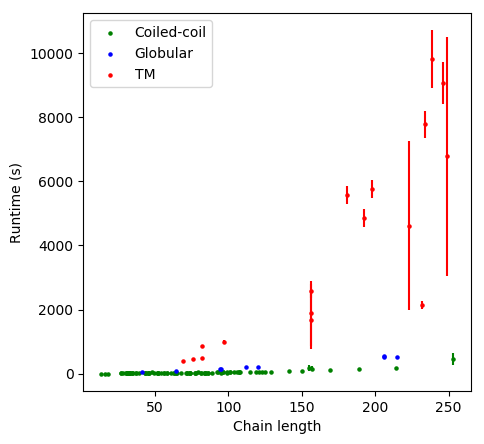

In [43]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
xvals = dft[dft['class'] == 'CC']['residues']
yvals = dft[dft['class'] == 'CC']['time']['mean']
yerr = dft[dft['class'] == 'CC']['time']['std']
ax.scatter(xvals, yvals, color='green', s=5)
ax.errorbar(xvals, yvals, yerr, fmt='none', ecolor='green')


xvals = dft[dft['class'] == 'Glob']['residues']
yvals = dft[dft['class'] == 'Glob']['time']['mean']
yerr = dft[dft['class'] == 'Glob']['time']['std']
ax.scatter(xvals, yvals, color='blue', s=5)
ax.errorbar(xvals, yvals, yerr, fmt='none', ecolor='blue')

xvals = dft[dft['class'] == 'TM']['residues']
yvals = dft[dft['class'] == 'TM']['time']['mean']
yerr = dft[dft['class'] == 'TM']['time']['std']
ax.scatter(xvals, yvals, color='red', s=5)
ax.errorbar(xvals, yvals, yerr, fmt='none', ecolor='red')

ax.set_xlabel(u'Chain length')
ax.set_ylabel('Runtime (s)')
ax.legend(['Coiled-coil', 'Globular', 'TM'], loc=2)
plt.show()
fig.savefig('CC_Glob_TM_timings.png', dpi=600)

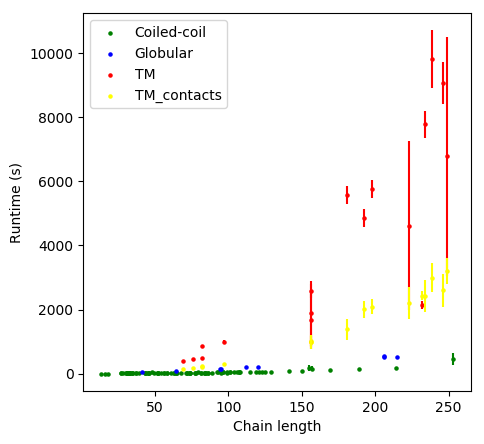

In [45]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
xvals = dft[dft['class'] == 'CC']['residues']
yvals = dft[dft['class'] == 'CC']['time']['mean']
yerr = dft[dft['class'] == 'CC']['time']['std']
ax.scatter(xvals, yvals, color='green', s=5)
ax.errorbar(xvals, yvals, yerr, fmt='none', ecolor='green')


xvals = dft[dft['class'] == 'Glob']['residues']
yvals = dft[dft['class'] == 'Glob']['time']['mean']
yerr = dft[dft['class'] == 'Glob']['time']['std']
ax.scatter(xvals, yvals, color='blue', s=5)
ax.errorbar(xvals, yvals, yerr, fmt='none', ecolor='blue')

xvals = dft[dft['class'] == 'TM']['residues']
yvals = dft[dft['class'] == 'TM']['time']['mean']
yerr = dft[dft['class'] == 'TM']['time']['std']
ax.scatter(xvals, yvals, color='red', s=5)
ax.errorbar(xvals, yvals, yerr, fmt='none', ecolor='red')

xvals = dfc['residues']
yvals = dfc['time']['mean']
yerr = dfc['time']['std']
ax.scatter(xvals, yvals, color='yellow', s=5)
ax.errorbar(xvals, yvals, yerr, fmt='none', ecolor='yellow')

ax.set_xlabel(u'Chain length')
ax.set_ylabel('Runtime (s)')
ax.legend(['Coiled-coil', 'Globular', 'TM', 'TM_contacts'], loc=2)
plt.show()
fig.savefig('CC_Glob_TM_Contacts_timings.png', dpi=600)